In [34]:
import pandas as pd

# Substitua o caminho do arquivo pelo caminho onde seu arquivo está salvo
file_path = 'spotify_dataset.csv'
spotify_df = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataframe
spotify_df.head()


,Nome da Faixa,Cantor ou Compositor,Genero,Quadrante,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Bulldog Down in Sunny Tennessee,Charlie Poole,Country; International,Q3,0.960000,0.649,0.390,0.000003,5,0.096,-12.237,1,0.0417,167.348,4,0.903
1,Reborn in Blasphemy,Dismember,Electronic; International; Pop/Rock,Q2,0.000008,0.246,0.985,0.839000,7,0.345,-4.002,1,0.1320,114.450,4,0.369
2,Ultrasonic Meltdown,Curse of the Golden Vampire,Electronic,Q2,0.000195,0.275,0.990,0.654000,6,0.263,-2.375,1,0.2690,152.620,4,0.141
3,Last Night,Little Walter,Blues,Q3,0.358000,0.458,0.443,0.000000,6,0.232,-10.422,0,0.0862,69.028,4,0.450
4,The Masquerade is Over,George Shearing,Jazz,Q4,0.826000,0.522,0.132,0.848000,8,0.699,-25.412,1,0.0608,90.675,4,0.539


In [35]:
# Verificando valores ausentes
missing_values = spotify_df.isnull().sum()
print("Valores Ausentes:\n", missing_values)

# Verificando os tipos de dados
print("\nTipos de Dados:\n", spotify_df.dtypes)


Valores Ausentes:
 Nome da Faixa           0
Cantor ou Compositor    0
Genero                  0
Quadrante               0
acousticness            0
danceability            0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
speechiness             0
tempo                   0
time_signature          0
valence                 0
dtype: int64

Tipos de Dados:
 Nome da Faixa            object
Cantor ou Compositor     object
Genero                   object
Quadrante                object
acousticness            float64
danceability            float64
energy                  float64
instrumentalness        float64
key                       int64
liveness                float64
loudness                float64
mode                      int64
speechiness             float64
tempo                   float64
time_signature            int64
valence                 float64
dtype: object


In [36]:
from sklearn.preprocessing import StandardScaler

# Selecione as colunas numéricas para normalização
num_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

# Aplicando a normalização
scaler = StandardScaler()
spotify_df[num_cols] = scaler.fit_transform(spotify_df[num_cols])


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [37]:
from sklearn.model_selection import train_test_split

X = spotify_df[num_cols]  # Características
y = spotify_df['Quadrante']  # Alvo

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Configurar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
knn.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# Salvar o modelo

joblib.dump(knn, 'KNN_MODEL.pkl')


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Matriz de Confusão:
 [[21  6  2  5]
 [ 8 23  1  2]
 [ 8  3 13 11]
 [13  4  8 14]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.42      0.62      0.50        34
          Q2       0.64      0.68      0.66        34
          Q3       0.54      0.37      0.44        35
          Q4       0.44      0.36      0.39        39

    accuracy                           0.50       142
   macro avg       0.51      0.51      0.50       142
weighted avg       0.51      0.50      0.49       142

Acurácia: 50.00%


['KNN_MODEL.pkl']

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

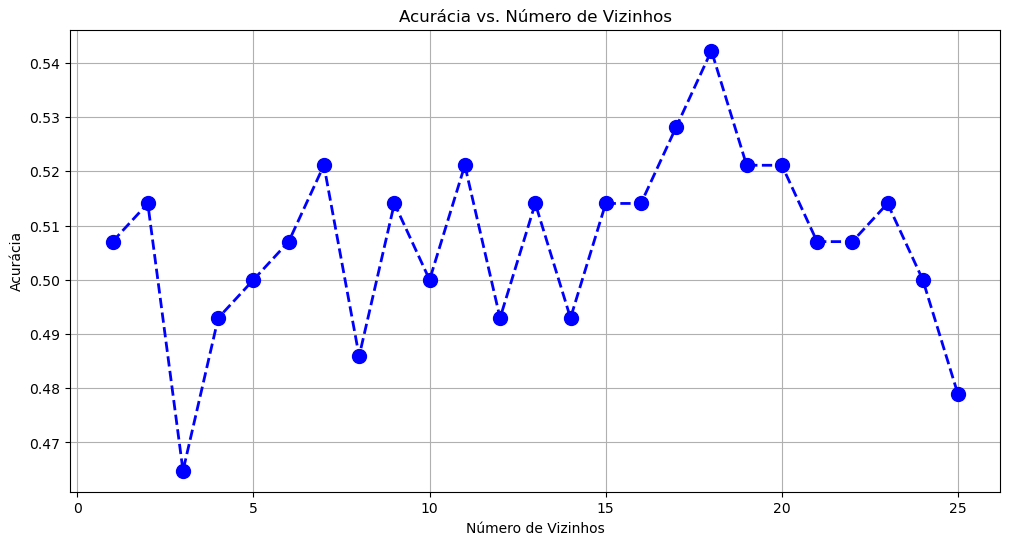

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Intervalo de valores para n_neighbors
neighbors = range(1, 26)

# Lista para armazenar as acurácias
accuracies = []

# Testar o modelo com diferentes valores de n_neighbors
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(neighbors, accuracies, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt.title('Acurácia vs. Número de Vizinhos')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

#### Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

# Criar uma instância do Gaussian Naive Bayes
nb = GaussianNB()

# Treinar o modelo
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_nb = nb.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_nb))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_nb))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_nb) * 100))


Matriz de Confusão:
 [[21  8  1  4]
 [ 5 26  2  1]
 [12  2 14  7]
 [11  3 10 15]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.43      0.62      0.51        34
          Q2       0.67      0.76      0.71        34
          Q3       0.52      0.40      0.45        35
          Q4       0.56      0.38      0.45        39

    accuracy                           0.54       142
   macro avg       0.54      0.54      0.53       142
weighted avg       0.54      0.54      0.53       142

Acurácia: 53.52%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

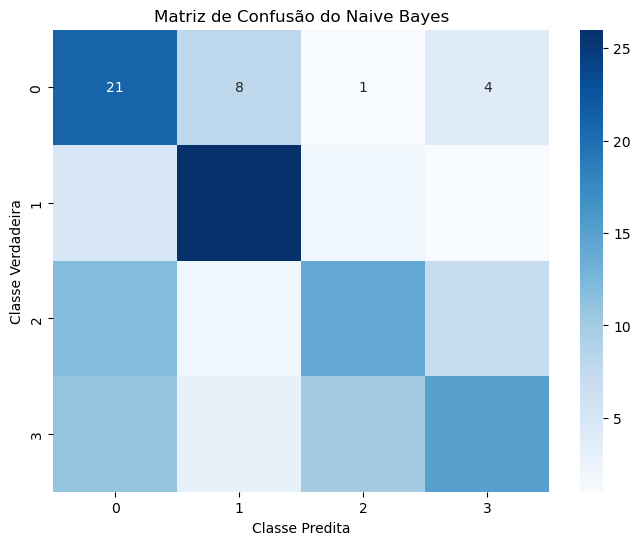

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obter a matriz de confusão
cm = confusion_matrix(y_test, y_pred_nb)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão do Naive Bayes')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


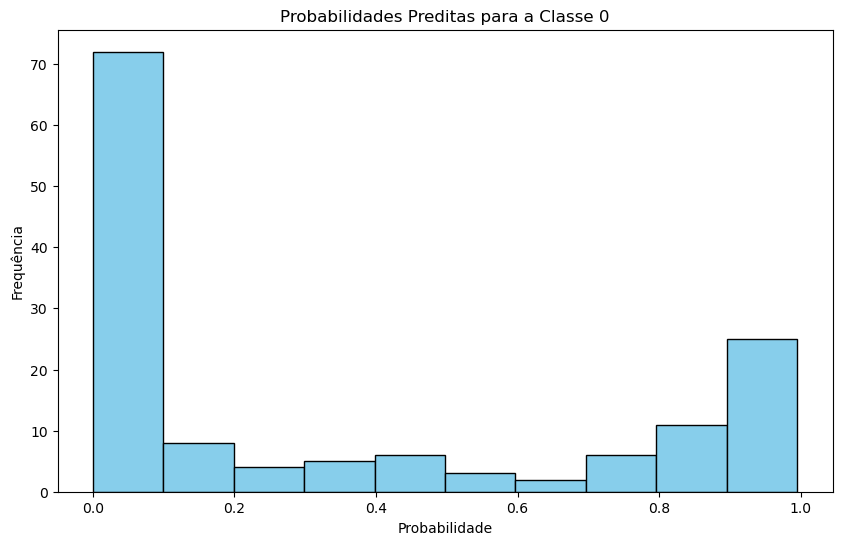

In [10]:
import numpy as np

# Obter probabilidades preditas
probabilidades = nb.predict_proba(X_test)

# Para simplificar, vamos plotar as probabilidades de uma classe
classe = 0  # ajuste conforme necessário
prob_classe = probabilidades[:, classe]

# Plotar as probabilidades
plt.figure(figsize=(10, 6))
plt.hist(prob_classe, bins=10, color='skyblue', edgecolor='black')
plt.title(f'Probabilidades Preditas para a Classe {classe}')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.show()

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


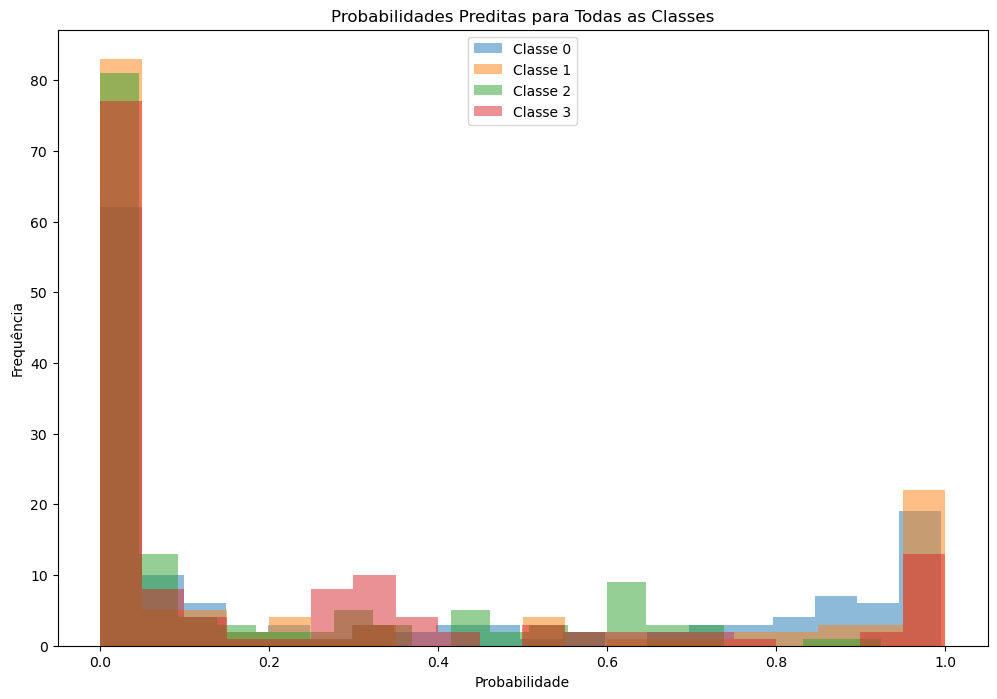

In [11]:
# Obter probabilidades preditas
probabilidades = nb.predict_proba(X_test)

# Número de classes
n_classes = probabilidades.shape[1]

plt.figure(figsize=(12, 8))

# Criar um histograma para cada classe
for i in range(n_classes):
    plt.hist(probabilidades[:, i], bins=20, alpha=0.5, label=f'Classe {i}')

plt.title('Probabilidades Preditas para Todas as Classes')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.legend(loc='upper center')
plt.show()

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

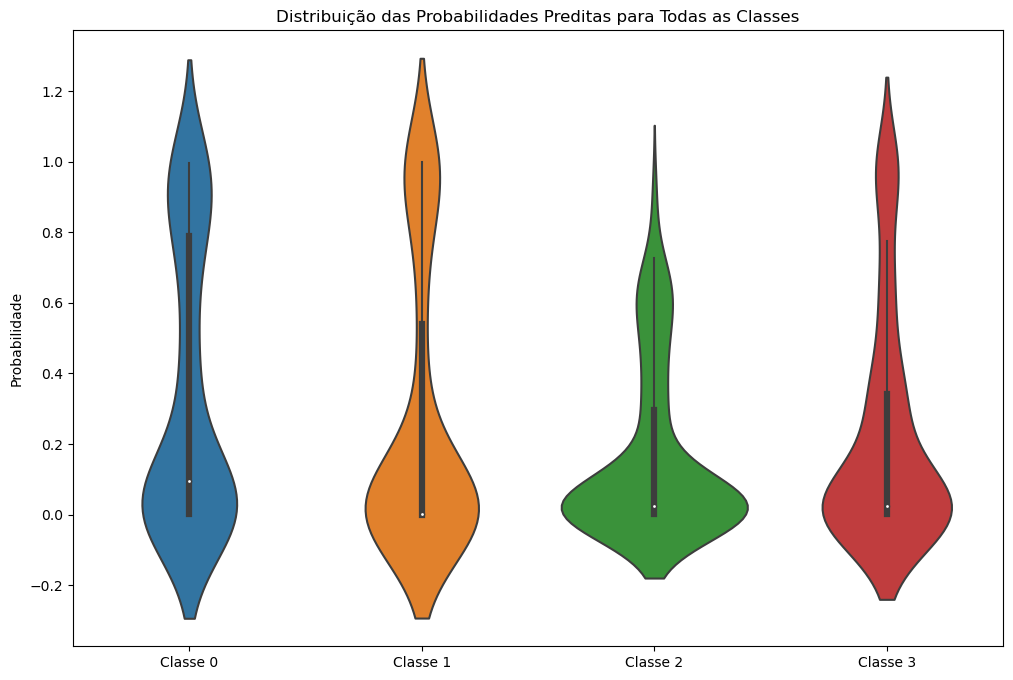

In [12]:
import pandas as pd
import seaborn as sns

# Converter as probabilidades em um DataFrame para facilitar a plotagem
df_prob = pd.DataFrame(probabilidades, columns=[f'Classe {i}' for i in range(n_classes)])

plt.figure(figsize=(12, 8))

# Criar um gráfico de violino para cada classe
sns.violinplot(data=df_prob)
plt.title('Distribuição das Probabilidades Preditas para Todas as Classes')
plt.ylabel('Probabilidade')
plt.show()

#### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Criar uma instância do modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Matriz de Confusão:
 [[21  6  1  6]
 [ 6 25  1  2]
 [ 8  2 13 12]
 [ 9  1 11 18]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.48      0.62      0.54        34
          Q2       0.74      0.74      0.74        34
          Q3       0.50      0.37      0.43        35
          Q4       0.47      0.46      0.47        39

    accuracy                           0.54       142
   macro avg       0.55      0.55      0.54       142
weighted avg       0.54      0.54      0.54       142

Acurácia: 54.23%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

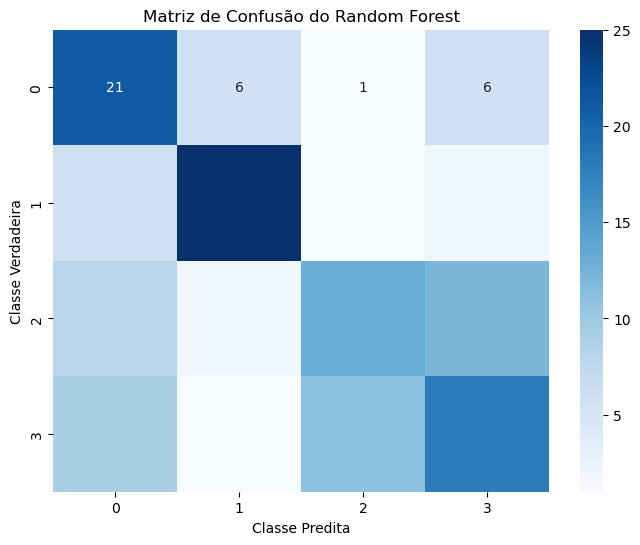

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obter a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão do Random Forest')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


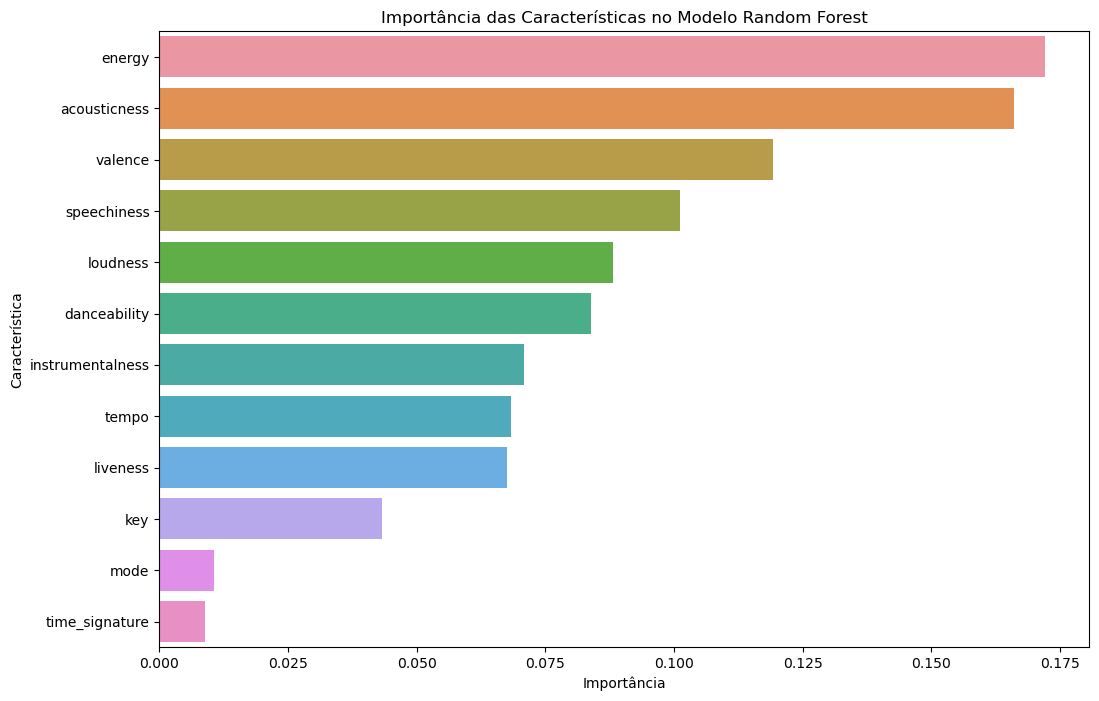

In [17]:
# Obter a importância das características
feature_importances = rf.feature_importances_

# Converter as importâncias em um DataFrame para facilitar a visualização
features_df = pd.DataFrame({'Característica': X_train.columns, 'Importância': feature_importances})

# Ordenar as características pela importância
features_df = features_df.sort_values(by='Importância', ascending=False)

# Plotar a importância das características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Característica', data=features_df)
plt.title('Importância das Características no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir as combinações de hiperparâmetros para testar
param_combinations = [
    {'n_estimators': 10, 'max_depth': None, 'min_samples_split': 2},
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 4},
    {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 6},
    {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 8}
]

# Lista para armazenar os resultados
results = []

# Testar cada combinação de hiperparâmetros
for params in param_combinations:
    rf = RandomForestClassifier(n_estimators=params['n_estimators'],
                                max_depth=params['max_depth'],
                                min_samples_split=params['min_samples_split'],
                                random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'params': params, 'accuracy': accuracy})

# Converter resultados em um DataFrame
results_df = pd.DataFrame(results)


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


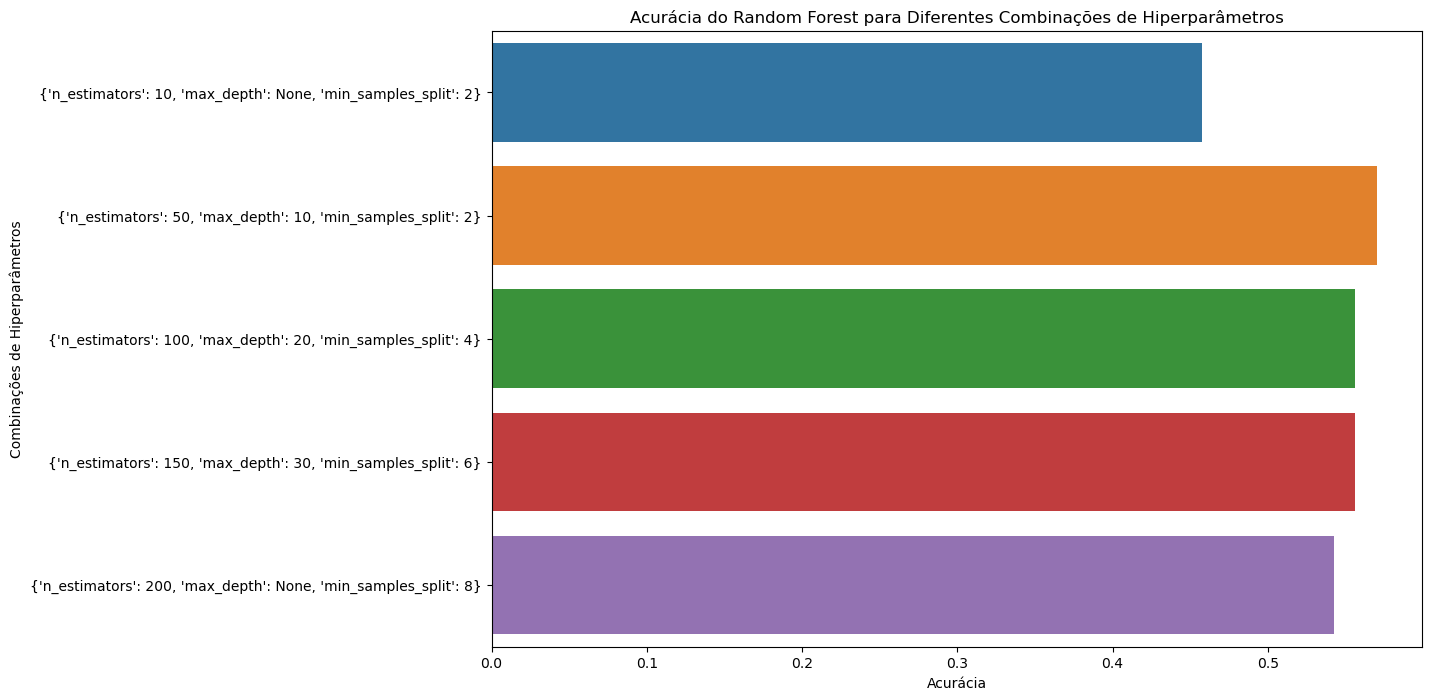

In [19]:
# Plotar os resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy', y=results_df['params'].astype(str), data=results_df)
plt.title('Acurácia do Random Forest para Diferentes Combinações de Hiperparâmetros')
plt.xlabel('Acurácia')
plt.ylabel('Combinações de Hiperparâmetros')
plt.show()


#### Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Criar uma instância do modelo Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)

# Treinar o modelo
gbc.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_gbc = gbc.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_gbc))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_gbc))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_gbc) * 100))

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Matriz de Confusão:
 [[18  6  4  6]
 [ 2 26  3  3]
 [ 9  1 12 13]
 [ 8  1  9 21]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.49      0.53      0.51        34
          Q2       0.76      0.76      0.76        34
          Q3       0.43      0.34      0.38        35
          Q4       0.49      0.54      0.51        39

    accuracy                           0.54       142
   macro avg       0.54      0.54      0.54       142
weighted avg       0.54      0.54      0.54       142

Acurácia: 54.23%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Definir as combinações de hiperparâmetros para testar
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5},
    {'n_estimators': 250, 'learning_rate': 0.2, 'max_depth': 4}
]

# Lista para armazenar os resultados
results = []

# Testar cada combinação de hiperparâmetros
for params in param_combinations:
    gbc = GradientBoostingClassifier(n_estimators=params['n_estimators'],
                                     learning_rate=params['learning_rate'],
                                     max_depth=params['max_depth'],
                                     random_state=42)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'params': params, 'accuracy': accuracy})

# Converter resultados em um DataFrame
results_df = pd.DataFrame(results)

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


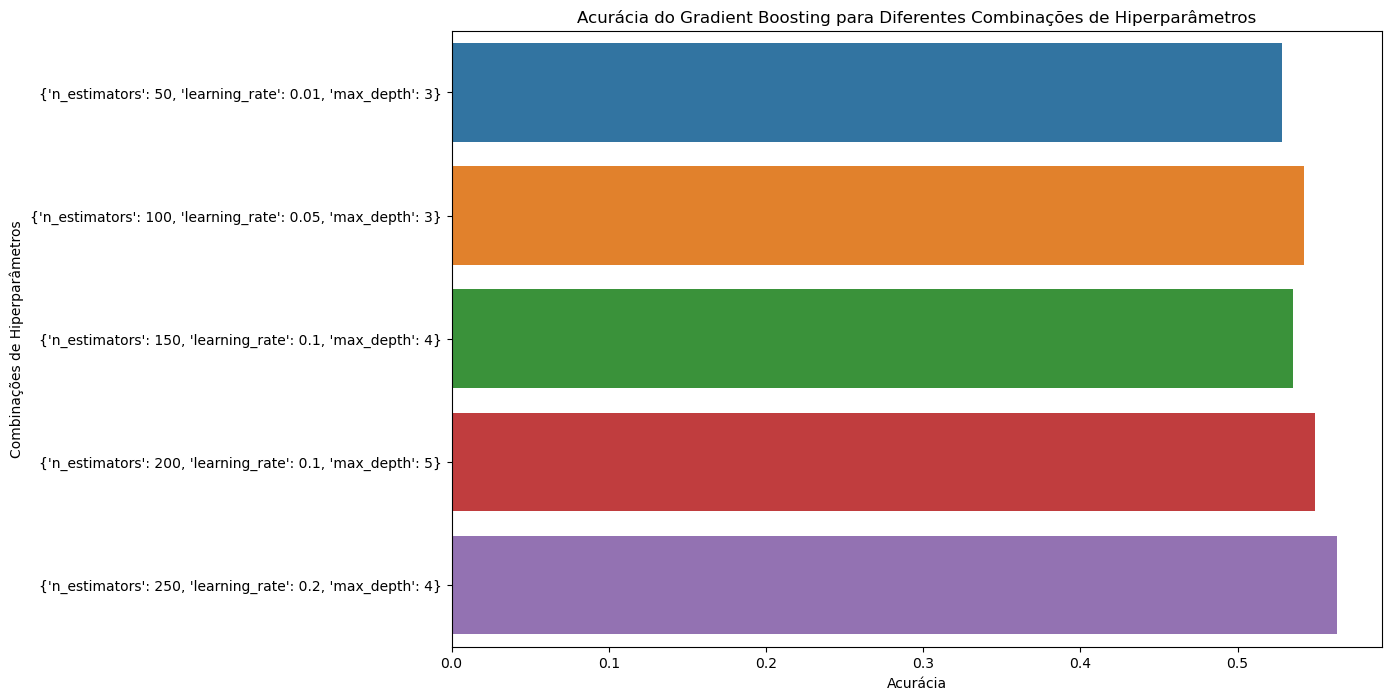

In [23]:
# Plotar os resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy', y=results_df['params'].astype(str), data=results_df)
plt.title('Acurácia do Gradient Boosting para Diferentes Combinações de Hiperparâmetros')
plt.xlabel('Acurácia')
plt.ylabel('Combinações de Hiperparâmetros')
plt.show()


#### XGBoosting

In [25]:
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
le = LabelEncoder()

# Ajustar e transformar as classes
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)



# Criar uma instância do modelo XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)

# Treinar o modelo XGBoost com as classes codificadas
xgb_clf.fit(X_train, y_train_encoded)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_clf.predict(X_test)

# Avaliar o modelo (lembre-se de decodificar as previsões de volta para as classes originais se necessário)
print("Matriz de Confusão:\n", confusion_matrix(y_test_encoded, y_pred_xgb))
print("\nRelatório de Classificação:\n", classification_report(y_test_encoded, y_pred_xgb))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_encoded, y_pred_xgb) * 100))


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

Matriz de Confusão:
 [[20  6  3  5]
 [ 4 26  2  2]
 [ 7  1 14 13]
 [ 6  1 12 20]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        34
           1       0.76      0.76      0.76        34
           2       0.45      0.40      0.42        35
           3       0.50      0.51      0.51        39

    accuracy                           0.56       142
   macro avg       0.56      0.57      0.56       142
weighted avg       0.56      0.56      0.56       142

Acurácia: 56.34%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Definir as combinações de hiperparâmetros para testar
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 5},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 6},
    {'n_estimators': 250, 'learning_rate': 0.2, 'max_depth': 7}
]

# Lista para armazenar os resultados
results = []

# Testar cada combinação de hiperparâmetros
for params in param_combinations:
    xgb_model = XGBClassifier(n_estimators=params['n_estimators'],
                              learning_rate=params['learning_rate'],
                              max_depth=params['max_depth'],
                              random_state=42)
    xgb_model.fit(X_train, y_train_encoded)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    results.append({'params': params, 'accuracy': accuracy})

# Converter resultados em um DataFrame
results_df = pd.DataFrame(results)

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


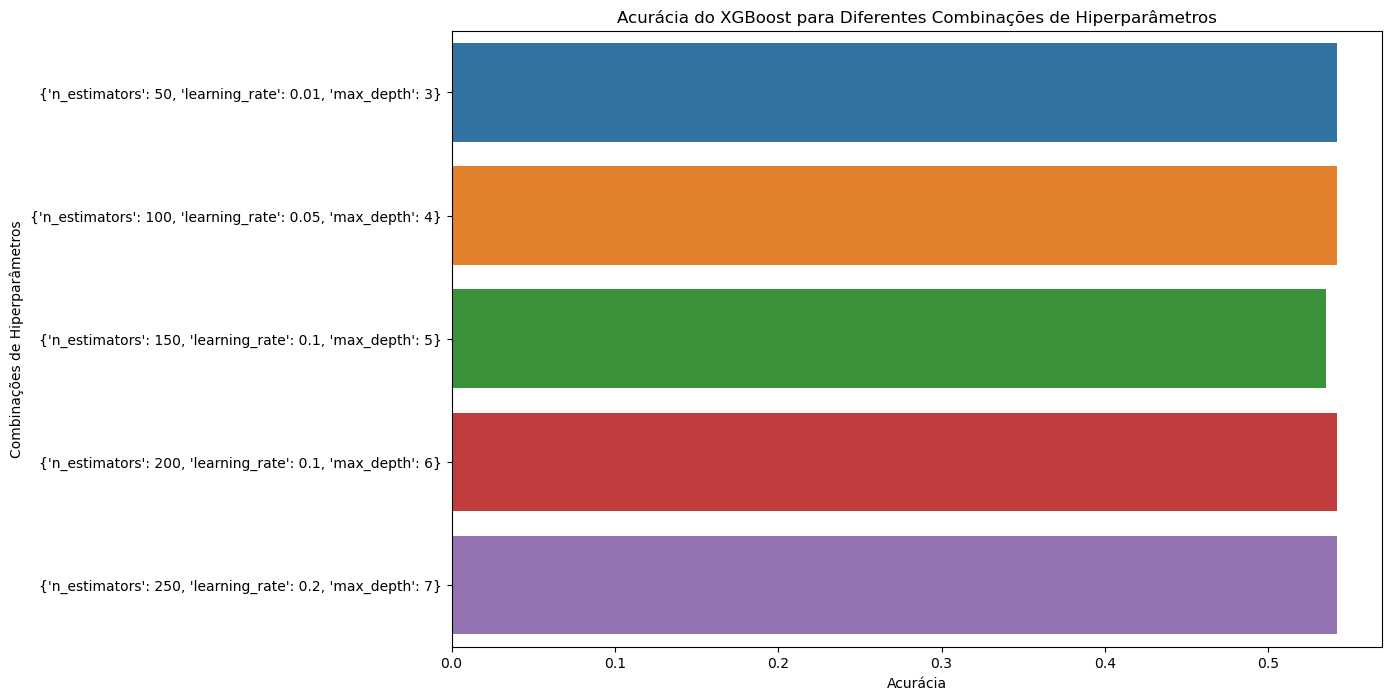

In [27]:
# Plotar os resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy', y=results_df['params'].astype(str), data=results_df)
plt.title('Acurácia do XGBoost para Diferentes Combinações de Hiperparâmetros')
plt.xlabel('Acurácia')
plt.ylabel('Combinações de Hiperparâmetros')
plt.show()


### Redes Neurais ####

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Criar o modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Usando 4 porque temos 4 classes (Q1, Q2, Q3, Q4)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Acurácia: {:.2f}%".format(accuracy * 100))



Epoch 1/50
15/15 [==============================] - 1s 31ms/step - loss: 1.6518 - accuracy: 0.2106 - val_loss: 1.3960 - val_accuracy: 0.2566
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 1.5274 - accuracy: 0.2506 - val_loss: 1.3414 - val_accuracy: 0.3009
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 1.4271 - accuracy: 0.3060 - val_loss: 1.3009 - val_accuracy: 0.4071
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 1.3555 - accuracy: 0.3481 - val_loss: 1.2660 - val_accuracy: 0.4602
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 1.2855 - accuracy: 0.3814 - val_loss: 1.2349 - val_accuracy: 0.5133
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 1.2588 - accuracy: 0.4279 - val_loss: 1.2048 - val_accuracy: 0.4867
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 1.2798 - accuracy: 0.4146 - val_loss: 1.1787 - val_accuracy: 0.4867
Epoch 8/50
15/15 [=

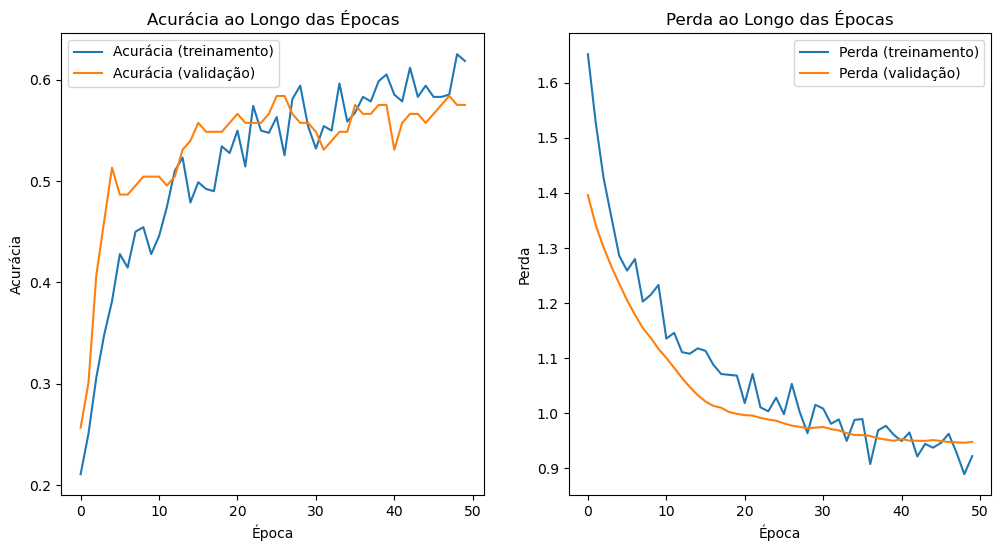

In [30]:

import matplotlib.pyplot as plt

# Plotar a acurácia do treinamento e validação
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia ao Longo das Épocas')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

# Plotar a perda do treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.title('Perda ao Longo das Épocas')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.show()


#### RNA - Mais profunda ####

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Criar o modelo
model_complex = Sequential()

# Primeira camada oculta
model_complex.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.5))

# Segunda camada oculta
model_complex.add(Dense(64, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.5))

# Terceira camada oculta
model_complex.add(Dense(32, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.5))

# Camada de saída
model_complex.add(Dense(4, activation='softmax'))  # 4 classes de saída


In [40]:
model_complex.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

history_complex = model_complex.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

# Salvar o modelo
model_complex.save('neural_network_model.h5')


Epoch 1/100
15/15 [==============================] - 2s 22ms/step - loss: 0.7707 - accuracy: 0.6541 - val_loss: 0.9532 - val_accuracy: 0.5575
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7838 - accuracy: 0.6962 - val_loss: 0.9510 - val_accuracy: 0.5575
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8586 - accuracy: 0.6319 - val_loss: 0.9553 - val_accuracy: 0.5487
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8436 - accuracy: 0.6430 - val_loss: 0.9516 - val_accuracy: 0.5841
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8117 - accuracy: 0.6275 - val_loss: 0.9540 - val_accuracy: 0.5664
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8249 - accuracy: 0.6452 - val_loss: 0.9618 - val_accuracy: 0.5752
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8195 - accuracy: 0.6275 - val_loss: 0.9685 - val_accuracy: 0.5664
Epoch 8/100


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


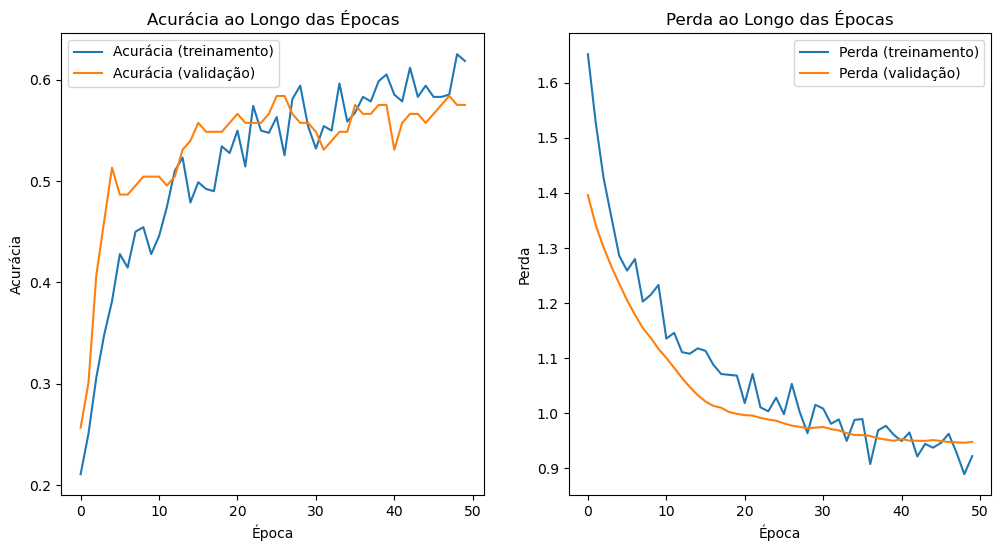

In [33]:
import matplotlib.pyplot as plt

# Plotar a acurácia do treinamento e validação
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia ao Longo das Épocas')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

# Plotar a perda do treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.title('Perda ao Longo das Épocas')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.show()
